In [1]:
import os
import numpy as np

In [2]:
def readr(file):
    l1=[]
    l2=[]
    with open(file) as f:
        for i in f:
            xi=i.split()
            l1.append(xi[1])
            l2.append(float(xi[2]))
    return l1,l2

In [3]:
def list_subfolders(dir_path):
    subfolders = []
    for root, dirs, files in os.walk(dir_path):
        for dir_name in dirs:
            subfolders.append(os.path.join(root, dir_name))
    return subfolders

namel=list_subfolders('./process_pdb/')
print(namel[0])

./process_pdb/4DNJ_A


In [4]:
def getnel():
    nel=[]
    with open("noerr.txt") as f:
        for i in f:
            nel.append(i.rstrip())
    return nel
noerrlist=getnel()

In [5]:
hbnam=[]
dl={}
num=0
for i in namel:
    rp=i+'/rec.pdb'
    lp=i+'/lig.pdb'
    if rp not in noerrlist:
        continue
    # print(rp,lp)
    # hbp=i+'/hb.pdb'
    # hb(rp,lp,hbp)
    hbnam.append(i)
    dl[i]=num
    num=num+1
print(len(hbnam),num)

1179 1179


In [6]:
# xxp=hbnam[0]+'/result.txt'
# print(xxp)
# xx1,xx2=readr(xxp)
# for i in xx1:
#     print(i,dl[i])

In [7]:
dis=np.zeros((1179, 1179))
for i in range(len(hbnam)):
    path=hbnam[i]+'/result.txt'
    ro,do=readr(path)
    for j in range(len(hbnam)):
        if j<i:
            dis[i][j]=dis[j][i]
        if j>i:
            dis[i][j]=do[j]
print(dis)

[[0.         1.06344351 1.44684711 ... 1.05171341 1.92463704 0.99442701]
 [1.06344351 0.         1.79152045 ... 1.56999589 1.89529896 1.14307771]
 [1.44684711 1.79152045 0.         ... 1.38879644 1.36511356 1.49404507]
 ...
 [1.05171341 1.56999589 1.38879644 ... 0.         2.07463568 1.53784051]
 [1.92463704 1.89529896 1.36511356 ... 2.07463568 0.         1.91927511]
 [0.99442701 1.14307771 1.49404507 ... 1.53784051 1.91927511 0.        ]]


/home/Grx/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


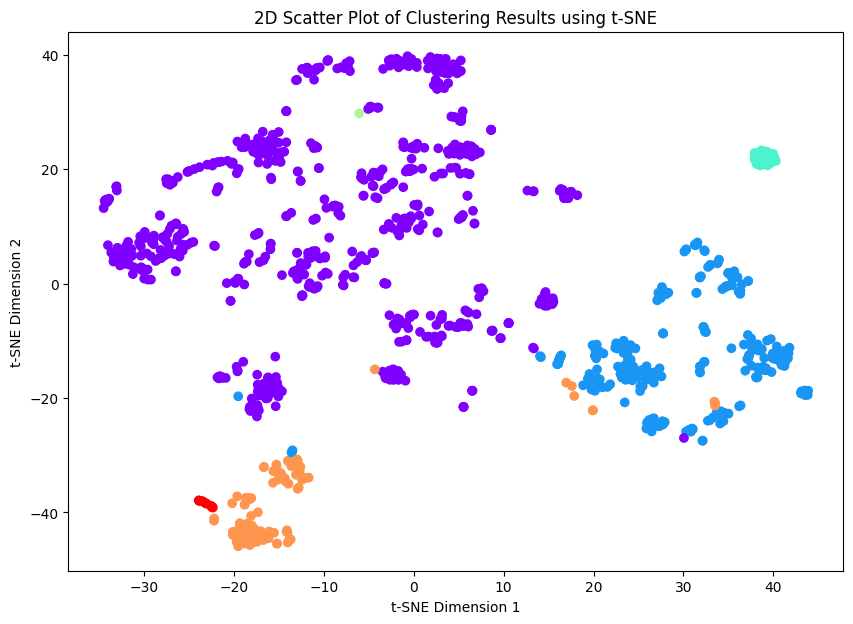

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# 假设这是你的距离矩阵 (1000x1000 的示例矩阵)
# 注意：这是一个随机生成的矩阵，实际情况下应该是你的实际距离矩阵
# np.random.seed(0)
# distance_matrix = np.random.rand(1000, 1000)
# distance_matrix = (distance_matrix + distance_matrix.T) / 2  # 对称化矩阵
# np.fill_diagonal(distance_matrix, 0)  # 对角线填充为0

distance_matrix = dis

# 使用 t-SNE 将距离矩阵降维到二维，设置 perplexity 为 30
# tsne = TSNE(n_components=2, metric='precomputed', perplexity=30, random_state=0)
# X_2d = tsne.fit_transform(distance_matrix)
tsne = TSNE(n_components=2, metric='precomputed', perplexity=30, random_state=0, init='random')
X_2d = tsne.fit_transform(distance_matrix)

# 使用 AgglomerativeClustering 进行层次聚类
model = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
labels = model.fit_predict(distance_matrix)

# 绘制二维散点图，使用不同颜色表示不同的聚类
plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='rainbow')
plt.title("2D Scatter Plot of Clustering Results using t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


[1.06344351 1.44684711 2.01776414 ... 2.07463568 1.53784051 1.91927511]


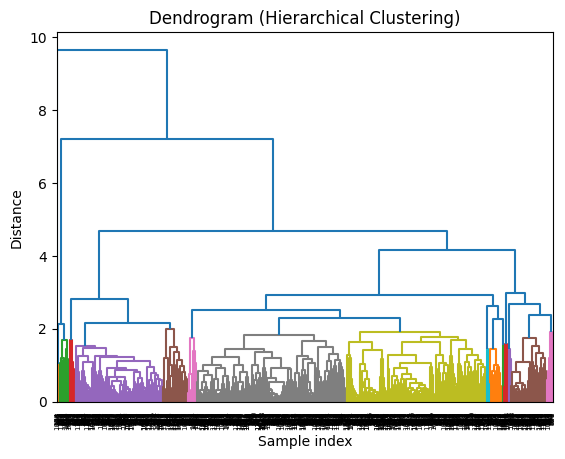

Cluster labels: [38 59 21 ... 48 88 41]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

# 创建示例距离矩阵
# distance_matrix = np.array([
#     [0, 1, 2, 3],
#     [1, 0, 4, 5],
#     [2, 4, 0, 6],
#     [3, 5, 6, 0]
# ])
distance_matrix = dis


# 将距离矩阵转换为压缩的距离向量
condensed_distance_matrix = squareform(distance_matrix)
#condensed_distance_matrix = distance_matrix
print(condensed_distance_matrix)

# 计算层次聚类的连接矩阵
Z = linkage(condensed_distance_matrix, method='complete')

# 绘制树状图
plt.figure()
dendrogram(Z, color_threshold=2)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 获取聚类标签
max_d = 1  # 设定阈值距离
labels = fcluster(Z, max_d, criterion='distance')
print("Cluster labels:", labels)

In [9]:
for i in range(1,10):
    labi = fcluster(Z, i, criterion='distance')
    print(i,np.max(labi))

1 101
2 16
3 5
4 5
5 3
6 3
7 3
8 2
9 2


In [14]:
d={}
for i in range(len(labels)):
    if labels[i] not in d:
        d[labels[i]]=1
    else:
        d[labels[i]]=d[labels[i]]+1
for i in d:
    print(i,d[i])

7 355
8 334
4 207
14 85
12 11
15 14
10 33
5 61
1 5
9 5
3 13
2 25
6 21
13 6
11 3
16 1


In [15]:
from scipy.spatial.distance import pdist, squareform


# 计算每个类的中位数点（Medoid）
medoids = []
for label in np.unique(labels):
    class_indices = np.where(labels == label)[0]
    class_distances = distance_matrix[np.ix_(class_indices, class_indices)]
    medoid_index = class_indices[np.argmin(class_distances.sum(axis=1))]
    medoids.append(medoid_index)

print("Medoids:\n", medoids)


Medoids:
 [991, 98, 715, 1021, 478, 349, 91, 45, 60, 1128, 1038, 4, 1025, 1053, 160, 1058]


In [16]:
# 计算每个类中最靠近质心的点
closest_to_centroid = []
for label in np.unique(labels):
    class_indices = np.where(labels == label)[0]
    class_distances = distance_matrix[np.ix_(class_indices, class_indices)]
    centroid = class_distances.mean(axis=1)
    closest_point_index = class_indices[np.argmin(centroid)]
    closest_to_centroid.append(closest_point_index)

print("Closest Points to Centroids:\n", closest_to_centroid)


Closest Points to Centroids:
 [991, 98, 715, 1021, 478, 349, 91, 45, 60, 1128, 1038, 4, 1025, 1053, 160, 1058]


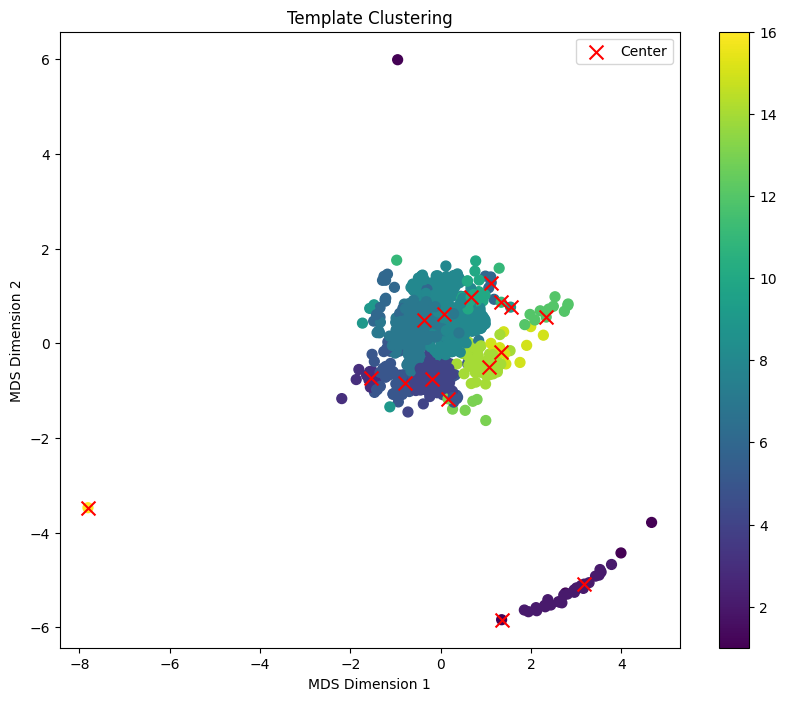

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 使用 MDS 降维到 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0, normalized_stress='auto')
X_2d = mds.fit_transform(distance_matrix)

# 绘制 2D 图，使用聚类标签进行着色
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(X_2d[closest_to_centroid, 0], X_2d[closest_to_centroid, 1], c='red', marker='x', s=100, label='Center')
#plt.scatter(X_2d[medoids, 0], X_2d[medoids, 1], c='blue', marker='o', s=100, label='Medoid')
plt.colorbar(scatter)
plt.title('Template Clustering')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend()
plt.show()


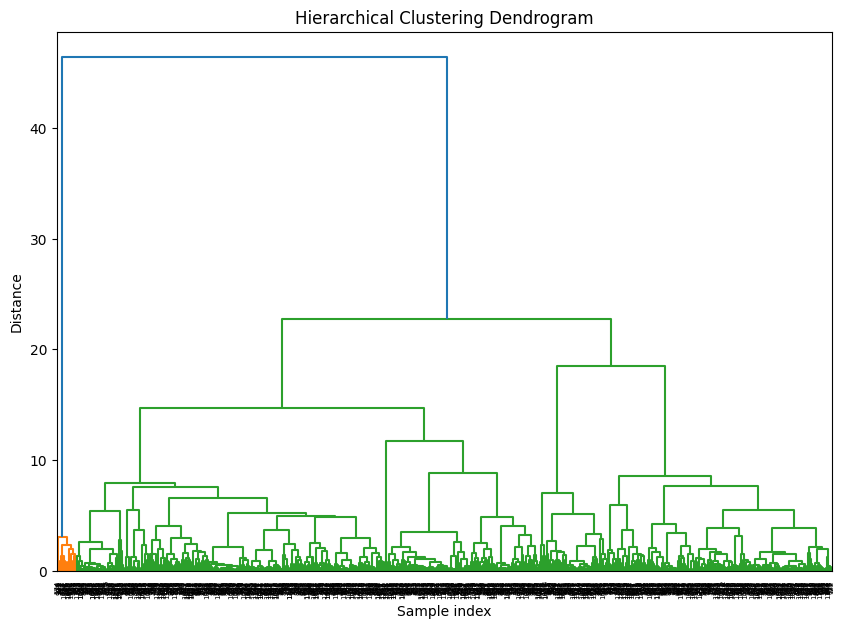

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 计算层次聚类的连接矩阵
Z = linkage(condensed_distance_matrix, method='ward')

# 绘制聚类树
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# # 创建示例数据
# np.random.seed(0)
# X = np.random.rand(10, 2)  # 10个数据点，每个点有2个特征

# # 计算成对距离
# distance_matrix = pdist(X, metric='euclidean')  # 计算欧几里得距离
# distance_matrix = squareform(distance_matrix)    # 转换为对称矩阵

# 绘制距离矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(dis, cmap='viridis', annot=True, fmt='.2f')
plt.title('Distance Matrix Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')

# 显示图形
plt.show()


In [8]:
from sklearn.manifold import TSNE

# 使用 t-SNE 降维到 2D
tsne = TSNE(n_components=2, metric='precomputed', random_state=0)
X_2d_tsne = tsne.fit_transform(dis)

# 绘制 2D 图
plt.scatter(X_2d_tsne[:, 0], X_2d_tsne[:, 1])
plt.title('t-SNE Projection')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


ValueError: The parameter init="pca" cannot be used with metric="precomputed".

/home/Grx/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


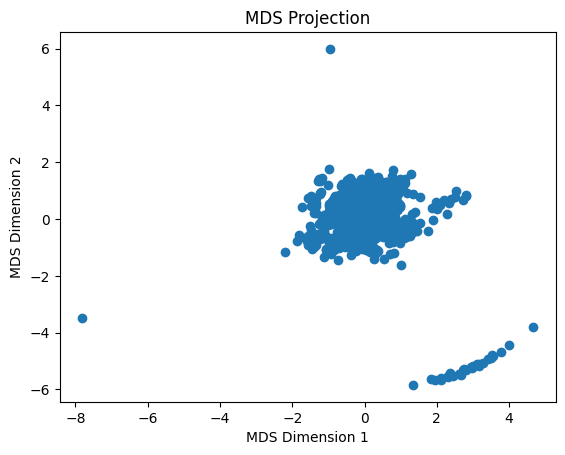

In [9]:
from sklearn.manifold import MDS

# 使用 MDS 降维到 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
X_2d = mds.fit_transform(dis)

# 绘制 2D 图
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('MDS Projection')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()


In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# 假设你已经有了 1000x1000 的距离矩阵
np.random.seed(0)
X = np.random.rand(1000, 2)  # 生成示例数据
distance_matrix = pdist(dis, metric='euclidean')  # 计算成对距离
distance_matrix = squareform(distance_matrix)  # 转换为对称矩阵

# 进行层次聚类
linkage_matrix = linkage(squareform(distance_matrix), method='ward')


/home/Grx/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


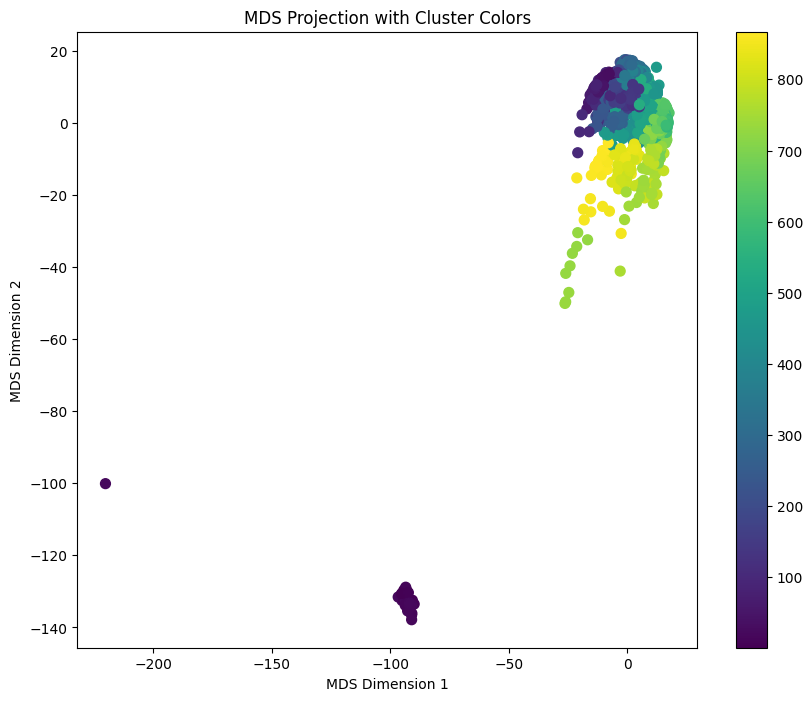

In [12]:
# 使用 MDS 降维到 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
X_2d = mds.fit_transform(distance_matrix)

# 获取聚类标签
max_d = 2  # 设置阈值来决定簇的数量
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# 绘制 2D 图，使用聚类标签进行着色
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(scatter)
plt.title('MDS Projection with Cluster Colors')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()
